## Открываем файл с данными и изучаем общую информацию

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
try:
    data = pd.read_csv('/home/aleks/Рабочий стол/real_estate_data.csv',sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv',sep='\t')
display(data.info())
display(data.head())
display(data.isna().sum())
data.duplicated().sum()

/tmp/ipykernel_7391/775913300.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

0

## Строим гистограммы по всем показателям

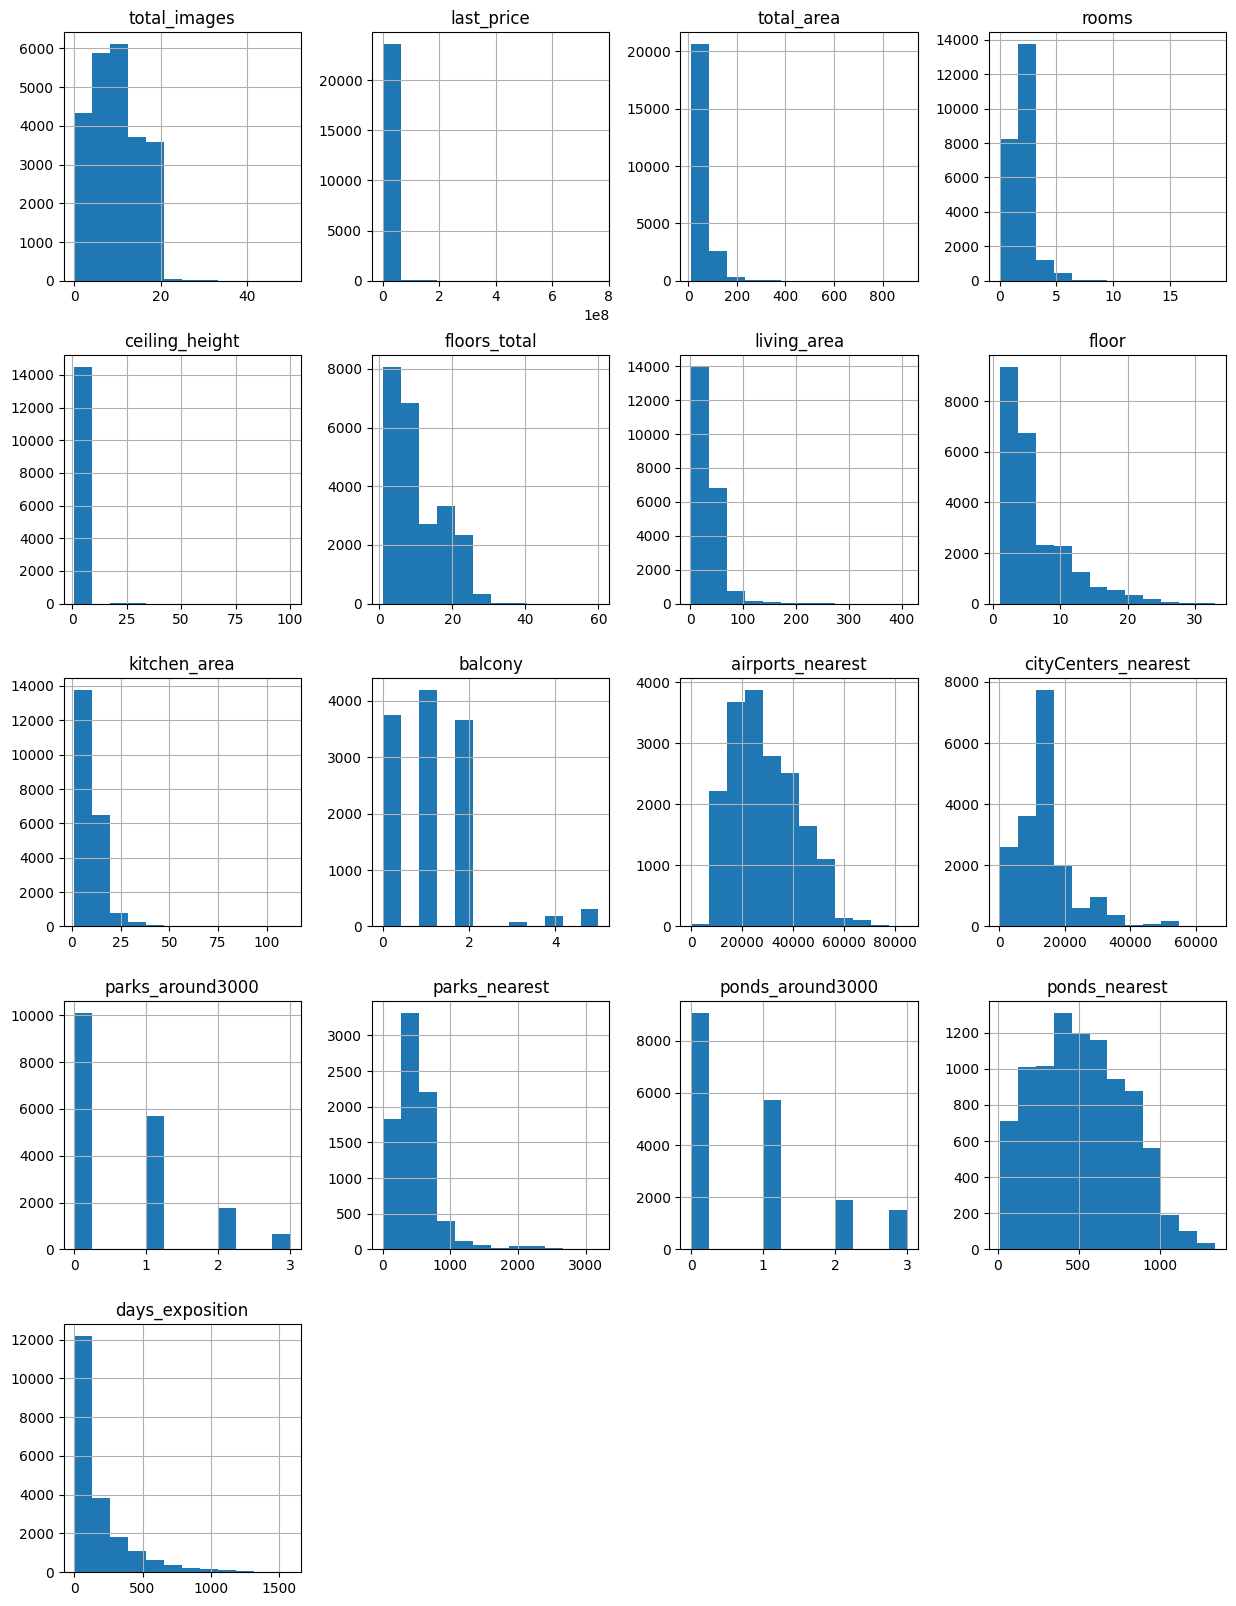

In [2]:
data.hist(figsize=(15, 20),bins=12)
plt.show()

# Предобработка данных

### Заполняем пропущенные значения

#### Заполняем пропуски в колонке жилой площади [living_area]

In [3]:
#Находим долю жилой площади от общей площади и медиану данного значения. 
#Затем заполняем пропуски умножив медиану на общую площадь

import statistics
med = statistics.median((data['living_area'] / data['total_area']).values)
data['living_area'] = data['living_area'].fillna(data['total_area'] * med)

#### Заполняем пропуски в колонке площадь кухни [kitchen_area]

In [4]:
#Находим отношение площади кухни к разности общей площади и жилой площади жилой площади. 
#Заполняем пропуски медианным значением

med = statistics.median(data['kitchen_area'] / (data['total_area'] - data['living_area']).values)
data['kitchen_area'] = data['kitchen_area'].fillna((data['total_area'] - data['living_area']) * med)

In [5]:
data.query('floors_total > floor')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,NaN,...,25.000000,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.600000,1,NaN,...,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.300000,4,NaN,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,66.458427,9,NaN,...,27.307349,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,NaN,...,41.000000,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.300000,3,NaN,...,13.830000,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.000000,4,NaN,...,8.500000,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.700000,1,NaN,...,7.967213,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,32.079775,12,NaN,...,23.300000,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


#### Заполняем прочие пропуски без дополнительных вычислений

In [6]:
#для высоты потолков и количества этажей берем медианное значение
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())
data['ceiling_height'] = data['ceiling_height'].round(decimals=2)
#для пустых локаций заменяем на "прочее"
data['locality_name'] = data['locality_name'].fillna('прочее')
#для балконов, парков и прудов заменяем пропуски нулями
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
#округляем дни экспозиции
data['days_exposition'] = data['days_exposition'].round()

#### Удаляем данные с "пустой" экспозицией

In [7]:
#Предполагаем, что квартиры там не проданы из-за нерыночной стоимости или по иным причным
#data = data.dropna(subset=['days_exposition'])

#### Анализируем уникальные названия поселений

In [8]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [9]:
data['locality_name'] = (
    data['locality_name'].replace(['посёлок'], 'поселок', regex=True)
)
data['locality_name'] = (
    data['locality_name'].replace(['поселок городского типа '], 'поселок ', regex=True)
)
data['locality_name'] = (
    data['locality_name'].replace(['городской поселок '], 'поселок ', regex=True)
)

#### Переводим дату экспозиции из типа object в тип datetime

In [10]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

### Добавляем новые столбцы

In [11]:
#находим цену за квадрат
data['price'] = (data['last_price'] / data['total_area']).round()

#выделяем день публикации (0 — понедельник, 1 — вторник и так далее)
data['weekday'] = data['first_day_exposition'].dt.weekday

#выделяем месяц публикации
data['month'] = data['first_day_exposition'].dt.month

#выделяем год публикации
data['year'] = data['first_day_exposition'].dt.year

#выделяем тип этажа квартиры (значения — «первый», «последний», «другой»)
def floors(floor,floor_total):
    try:
        if floor == 1:
            return 'первый'
        elif floor == floor_total:
            return 'последний'
        else:
            return 'другой'
    except:
        pass
data['floor_type'] = data.apply(lambda floor: floors(floor['floor'], floor['floors_total']), axis=1)

#проверяем что все ок
display(data.query('floor == 1')[['floor','floors_total','floor_type']].head(2))
display(data.query('floor == floors_total')[['floor','floors_total','floor_type']].head(2))
display(data.query('floor != floors_total and floor > 1')[['floor','floors_total','floor_type']].head(2))

,floor,floors_total,floor_type
1,1,11.0,первый
14,1,6.0,первый


,floor,floors_total,floor_type
12,5,5.0,последний
13,5,5.0,последний


,floor,floors_total,floor_type
0,8,16.0,другой
2,4,5.0,другой


In [12]:
#выделяем расстояние до центра города в километрах (переведим из м в км и округляем до ближайших целых значений).

data['airports_nearest'] = (data['airports_nearest']/1000).round()
data['cityCenters_nearest'] = (data['cityCenters_nearest']/1000).round()

# Проводим исследовательский анализ

### Изучаем параметры ниже на наличие некорректных данных и аномальных значений:
* общая площадь
* жилая площадь
* площадь кухни
* цена объекта
* количество комнат
* высота потолков
* тип этажа квартиры («первый», «последний», «другой»)
* общее количество этажей в доме
* расстояние до центра города в метрах
* расстояние до ближайшего парка

In [13]:
data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price,weekday,month,year
count,23699.000000,2.369900e+04,23699.000000,23699,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,...,18180.000000,23699.000000,8079.000000,23699.000000,9110.000000,20518.000000,2.369900e+04,23699.000000,23699.000000,23699.000000
mean,9.858475,6.541549e+06,60.348651,2017-11-08 21:55:18.975484160,2.070636,2.724358,10.667750,33.816137,5.892358,10.391819,...,14.184818,0.469049,490.804555,0.590911,517.980900,180.888634,9.942166e+04,2.569307,6.400101,2017.367146
min,0.000000,1.219000e+04,12.000000,2014-11-27 00:00:00,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.120000e+02,0.000000,1.000000,2014.000000
25%,6.000000,3.400000e+06,40.000000,2017-05-12 12:00:00,1.000000,2.600000,5.000000,18.400000,2.000000,7.000000,...,9.000000,0.000000,288.000000,0.000000,294.000000,45.000000,7.658550e+04,1.000000,3.000000,2017.000000
50%,9.000000,4.650000e+06,52.000000,2017-12-12 00:00:00,2.000000,2.650000,9.000000,29.900000,4.000000,9.000000,...,13.000000,0.000000,455.000000,0.000000,502.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000
75%,14.000000,6.800000e+06,69.900000,2018-08-26 00:00:00,3.000000,2.700000,16.000000,41.950000,8.000000,11.900000,...,16.000000,1.000000,612.000000,1.000000,729.000000,232.000000,1.142560e+05,4.000000,10.000000,2018.000000
max,50.000000,7.630000e+08,900.000000,2019-05-03 00:00:00,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,...,66.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000
std,5.682529,1.088701e+07,35.654083,NaN,1.078405,0.988298,6.585961,21.899001,4.885249,6.033997,...,8.616194,0.748534,342.317995,0.883999,277.720643,219.727988,5.030680e+04,1.789082,3.491561,1.039771


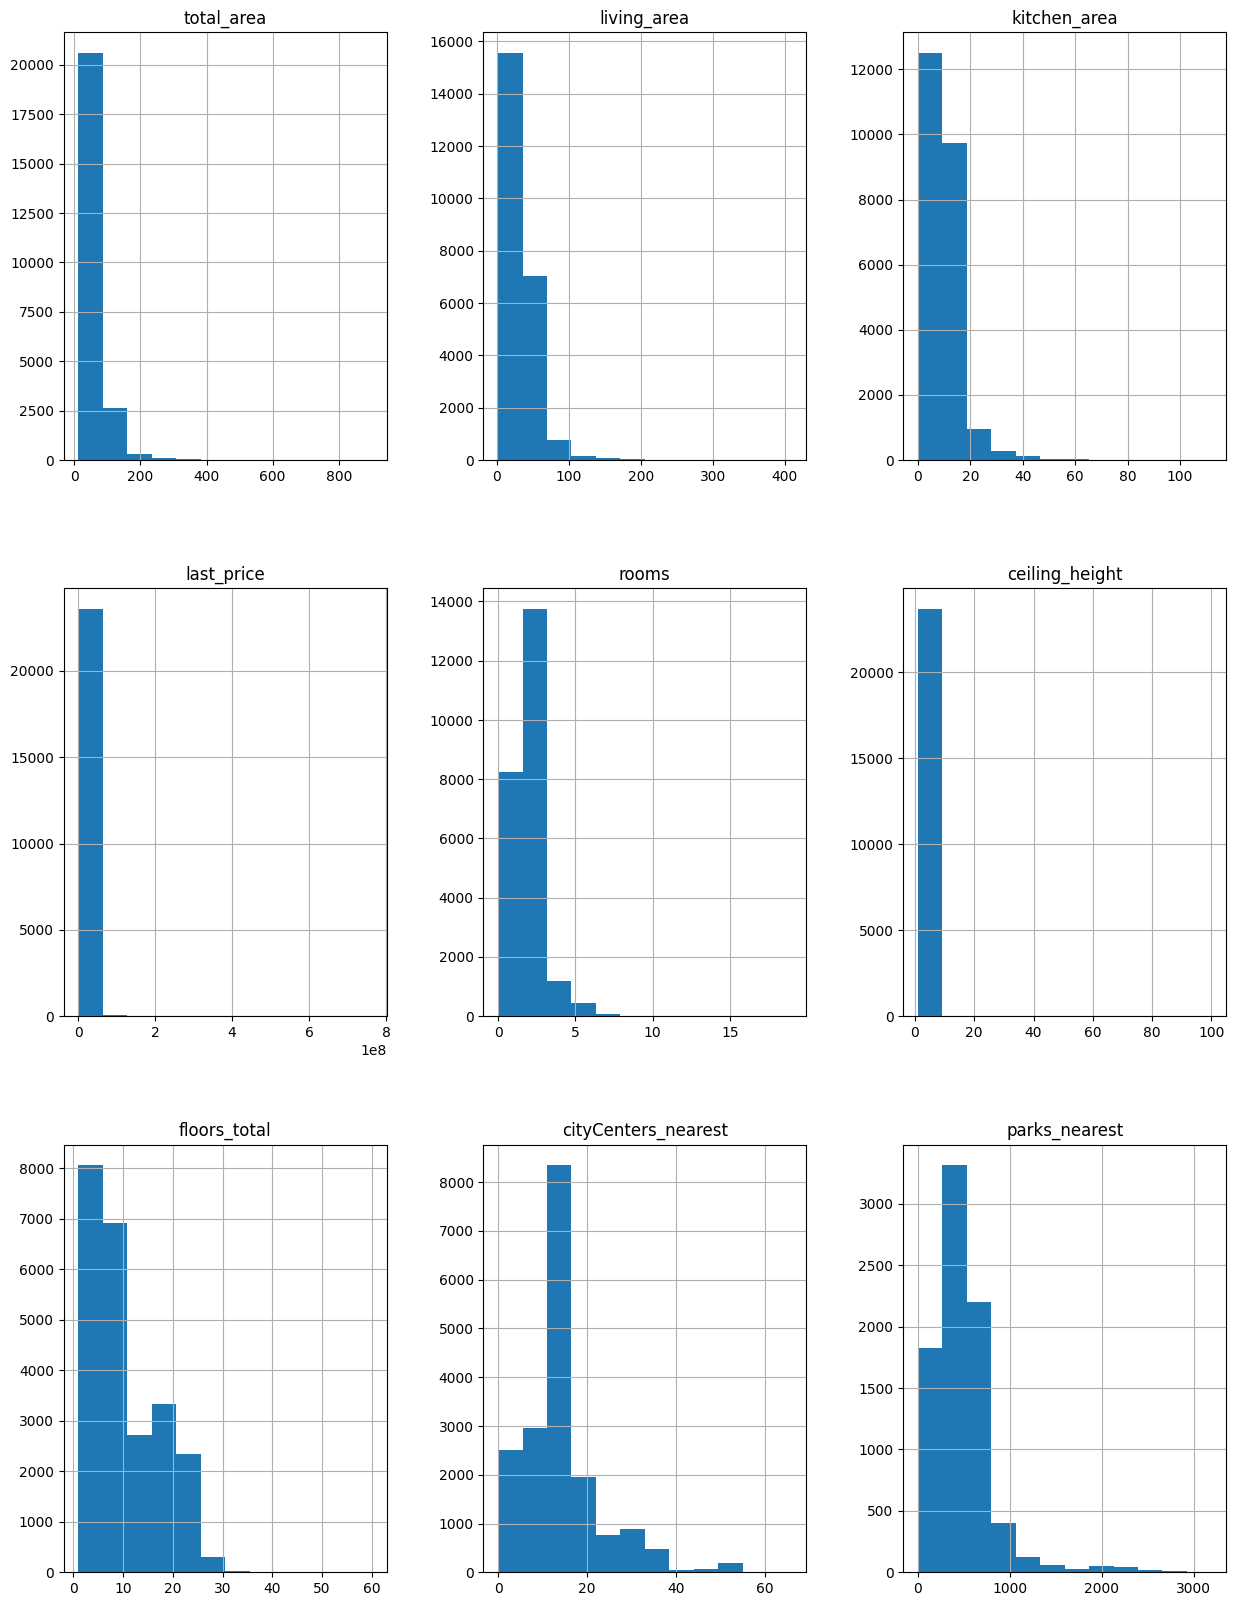

In [14]:
data[[
      'total_area', 'living_area',   'kitchen_area',  'last_price',
      'rooms', 'ceiling_height', 'floor_type', 'floors_total',
      'cityCenters_nearest', 'parks_nearest'
]].hist(figsize=(15, 20),bins=12)
plt.show()

<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">
<h5><b>Вывод</b></h5>
       
Видим экстремальные значение в части параметров общая площадь (800 кв.м.), жилая площадь (400 кв.м.), площадь кухни (более 100 кв.м.), высота потолков (100 м), количество комнат (15), количество этажей (60), которые не соответствуют дествительности, либо являются выбросам и как следствие искажают общее представление на гистрограммах.

Необходимо удалить, либо преобразовать некорректные данные

In [15]:
display(data.sort_values(by='ceiling_height', ascending=False).head(2)) #удаляем одну запись, некорректные преобразовываем
display(data.sort_values(by='living_area', ascending=False).head()) #скорректируем выборку через размах
display(data.query('floors_total> 37')) #исключим из выборки. На статистику не повлияет, да и вряд ли в Кронштдате есть небоскреб
display(data.sort_values(by='last_price', ascending=False).head()) #проверить записи после обработки living_area

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price,weekday,month,year,floor_type
22869,0,15000000.0,25.0,2018-07-25,1,100.0,5.0,14.0,5,True,...,1.0,223.0,3.0,30.0,19.0,600000.0,2,7,2018,последний
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3.0,53.0,2,NaN,...,0.0,NaN,0.0,NaN,NaN,38667.0,0,11,2018,другой


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price,weekday,month,year,floor_type
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,NaN,...,0.0,NaN,2.0,318.0,106.0,466667.0,2,12,2017,последний
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,NaN,...,1.0,767.0,0.0,NaN,14.0,110169.0,3,2,2019,другой
12401,20,91500000.0,495.0,2017-06-19,7,4.65,7.0,347.5,7,NaN,...,2.0,110.0,0.0,NaN,14.0,184848.0,0,6,2017,последний
4237,1,50000000.0,517.0,2017-10-14,7,2.65,4.0,332.0,3,NaN,...,2.0,477.0,2.0,540.0,NaN,96712.0,5,10,2017,другой
12859,20,140000000.0,631.2,2019-04-09,7,3.90,4.0,322.3,4,NaN,...,0.0,NaN,2.0,210.0,NaN,221800.0,1,4,2019,последний


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price,weekday,month,year,floor_type
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60.0,27.4,4,NaN,...,2.0,342.0,3.0,614.0,166.0,83516.0,3,6,2018,другой
16731,9,3978000.0,40.0,2018-09-24,1,2.65,52.0,10.5,18,NaN,...,1.0,793.0,0.0,NaN,45.0,99450.0,0,9,2018,другой


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price,weekday,month,year,floor_type
12971,19,763000000.0,400.0,2017-09-30,7,2.65,10.0,250.0,10,NaN,...,1.0,530.0,3.0,756.0,33.0,1907500.0,5,9,2017,последний
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,NaN,...,0.0,NaN,2.0,318.0,106.0,466667.0,2,12,2017,последний
14706,15,401300000.0,401.0,2016-02-20,5,2.65,9.0,204.0,9,False,...,1.0,545.0,1.0,478.0,393.0,1000748.0,5,2,2016,последний
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7.0,95.0,5,NaN,...,3.0,519.0,3.0,285.0,233.0,1736842.0,2,4,2018,другой
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7.0,258.0,5,NaN,...,0.0,NaN,2.0,198.0,111.0,485437.0,0,12,2017,другой


In [16]:
data = data.query('ceiling_height != 100 and ceiling_height > 1.2')
data = data.query('floors_total < 40')
def ceiling(ceiling_height):
    try:
        if ceiling_height >=20:
            return ceiling_height/10
        else:
            return ceiling_height
    except:
        pass
data['ceiling_height'] = data['ceiling_height'].apply(ceiling)      

In [17]:
data = data.query('ceiling_height < 6' ) #исключаем из выборки квартиры с потолками более 6 метров

<Axes: >

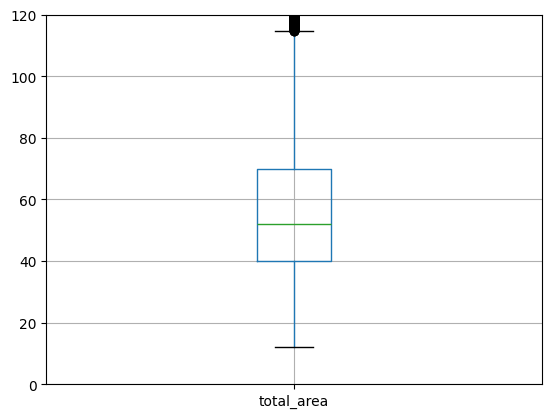

In [18]:
plt.ylim(0, 120)
data[['total_area']].boxplot()

<Axes: >

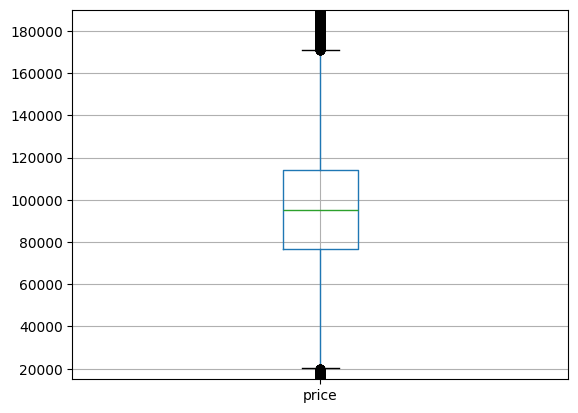

In [19]:
plt.ylim(15000, 190000)
data[['price']].boxplot()

<Axes: >

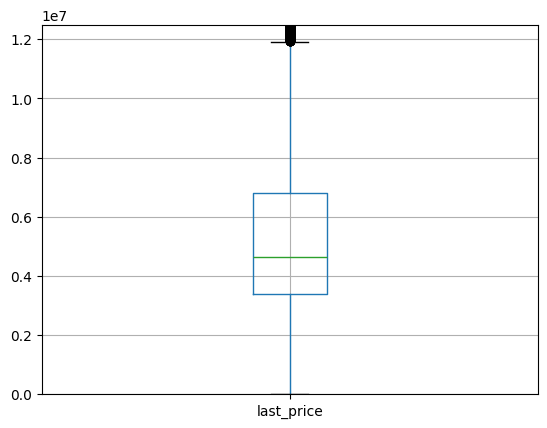

In [20]:
plt.ylim(0, 12500000)
data[['last_price']].boxplot()

<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">
<h5><b>Вывод</b></h5>
    
Квартиры, общая площадь которых более 120 кв.м., является аномальными. Исключаем их из выборки и заново строим гистограммы.
Жилье стоимостью более 12 500 000 руб. также исключаем из выборки (~3% от общей выборки), это отдельный сегмент который надо отдельно анализировать, не в данной выборке.
Также исключаем жилье площадь свыше 200 тыс. руб. за кв.м. (еще порядка 40 строк, не критично, но выбивается по размаху)

In [21]:
data = data.drop(data[data['total_area'] > 120].index)
data = data.drop(data[data['last_price'] > 12500000].index)
data = data.drop(data[data['ceiling_height'] > 4.5].index)
data = data.drop(data[data['price'] > 200000].index)

#data = data.query('total_area < 120')
#data = data.query('last_price < 12500000')
#data = data.query('ceiling_height < 4.5')

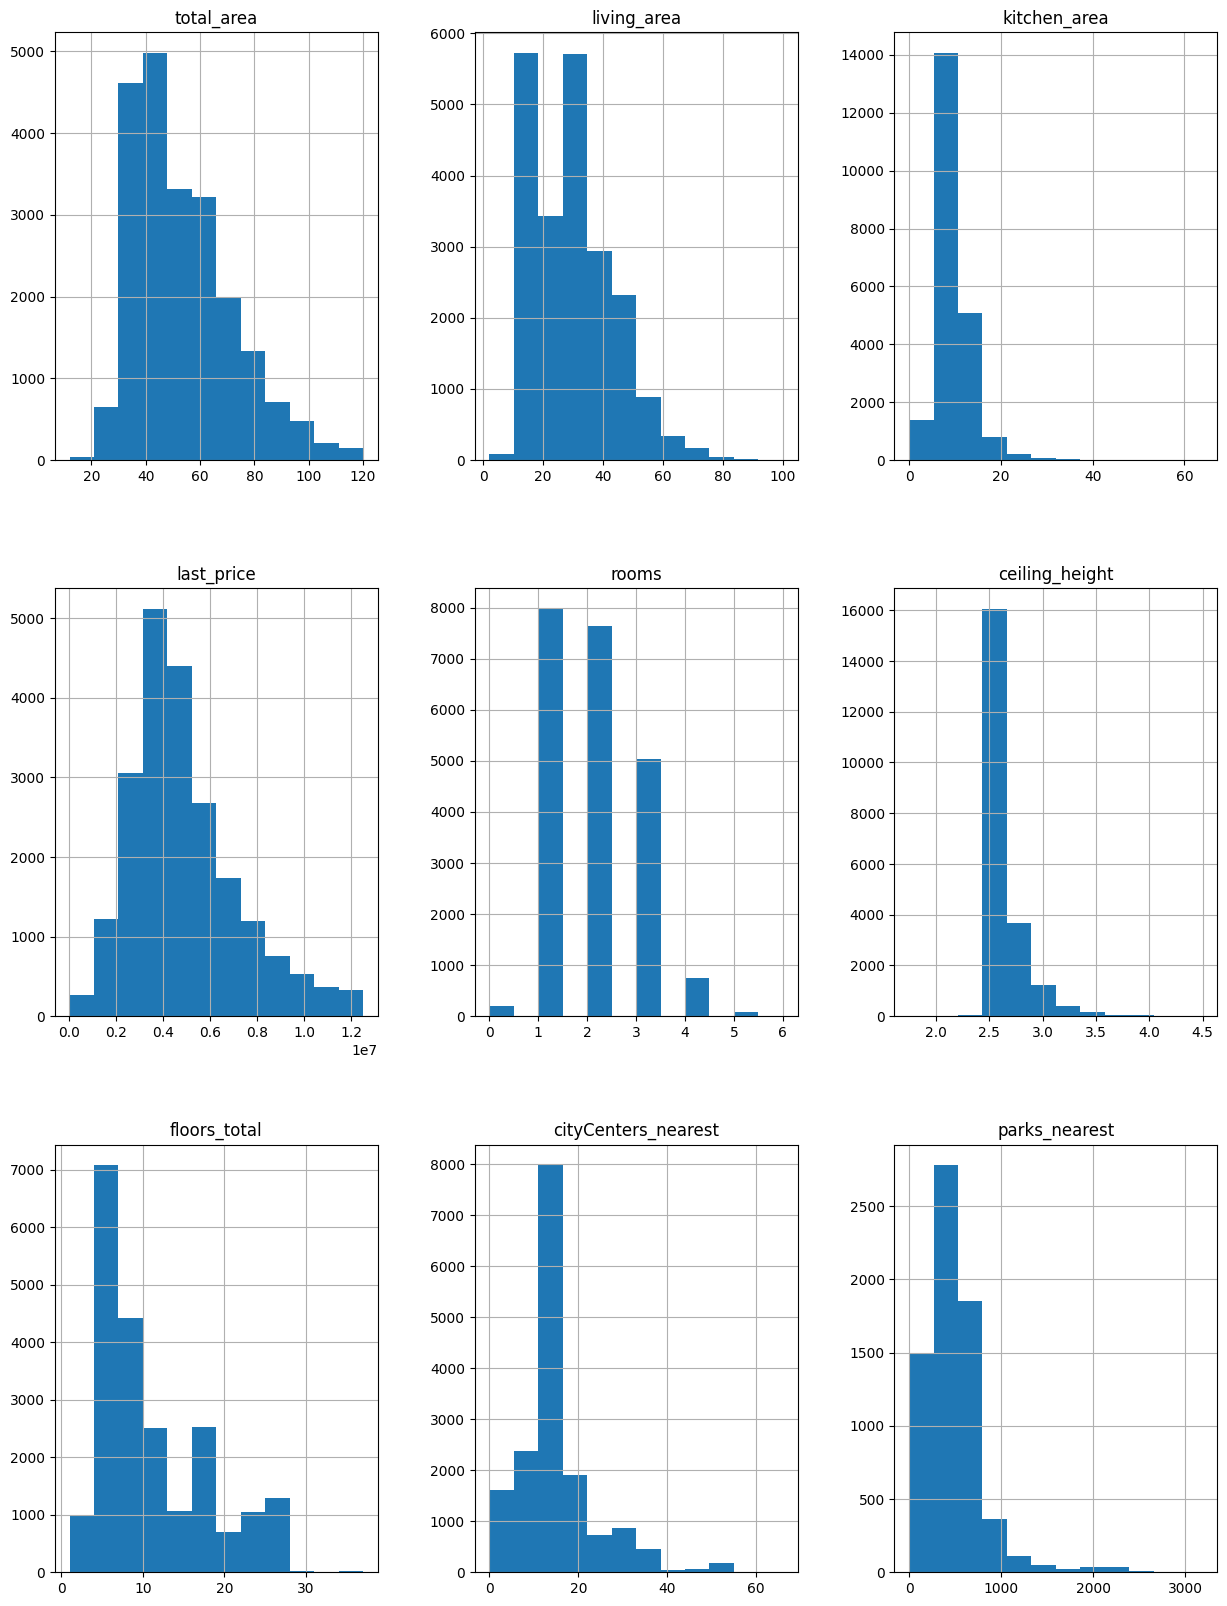

In [22]:
data[[
      'total_area', 'living_area',   'kitchen_area',  'last_price',
      'rooms', 'ceiling_height', 'floor_type', 'floors_total',
      'cityCenters_nearest', 'parks_nearest'
]].hist(figsize=(15, 20),bins=12)
plt.show()

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21679 entries, 1 to 23698
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21679 non-null  int64         
 1   last_price            21679 non-null  float64       
 2   total_area            21679 non-null  float64       
 3   first_day_exposition  21679 non-null  datetime64[ns]
 4   rooms                 21679 non-null  int64         
 5   ceiling_height        21679 non-null  float64       
 6   floors_total          21679 non-null  float64       
 7   living_area           21679 non-null  float64       
 8   floor                 21679 non-null  int64         
 9   is_apartment          2519 non-null   object        
 10  studio                21679 non-null  bool          
 11  open_plan             21679 non-null  bool          
 12  kitchen_area          21679 non-null  float64       
 13  balcony              

<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">
<h5><b>Вывод</b></h5>
    
Данные обработаны. Кол-во записей сократилось примерно на 9.5%, то есть не критично. При этом были исключены аномальные значения, искажающие общую статистику.

Согласно построенным диаграммам наибольшую долю составляют квартиры общей площадь от 30 до 60 кв.м., имеющие от 1 до 3 комнат, с кухней порядка 10 кв.м. 
Представлены дома со средней этажностью до 10 этажей. 
В подавляющем большинстве квартир высота потолков составляем 2.7-2.8 метров

### Анализируем динамику продаж

count    19022.000000
mean       172.910314
std        210.853704
min          1.000000
25%         44.000000
50%         91.000000
75%        219.000000
max       1580.000000
Name: days_exposition, dtype: float64

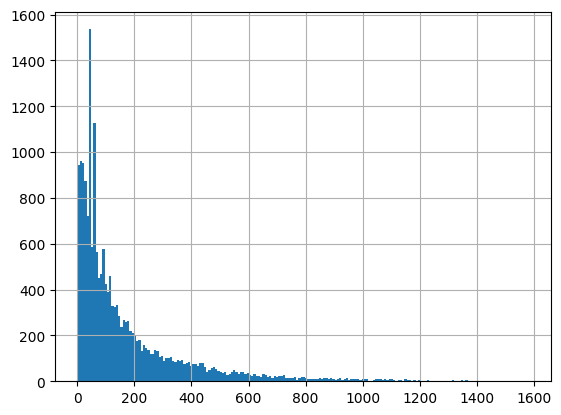

In [24]:
data['days_exposition'].hist(bins=200)
data['days_exposition'].describe()

<Axes: >

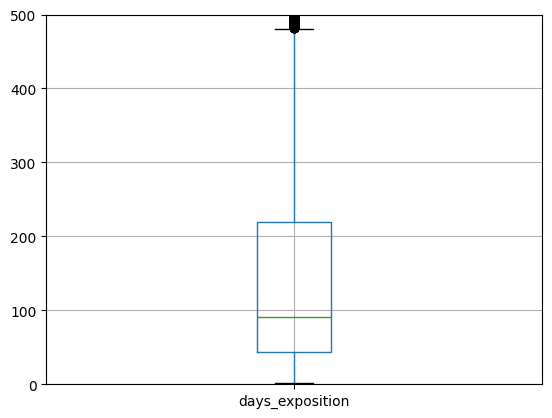

In [25]:
plt.ylim(0, 500)
data[['days_exposition']].boxplot()

<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">
<h5><b>Вывод</b></h5>

Квартиры как правило продаются в течение полугода (медиана 172 дня). Застойными можем считать квартиры, срок экспозиции которых превышает 220 дней (квантиль 75%). Эстремально долгой продажей считаем срок свыше 500 дней (1.5 межквантильного размаха).
Длительный срок продажи как правило связан с не рыночностью цены, но в итоге квартиры были проданы, соответственно их цена достигла рыночных значений

### Анализируем факторы, влияющие на стоимость объекта

In [26]:
array = ['total_area','living_area','kitchen_area','rooms']
for element in array:
    try:
        if data[element].corr(data['last_price'])>0.7:
            print('Last_price и', element, 'имеют сильную положительную связь, кэф корреляции составляет:' , data[element].corr(data['last_price']))
        elif data[element].corr(data['last_price'])>0.3:
            print('Last_price и', element, 'имеют умеренную положительную связь, кэф корреляции составляет:' , data[element].corr(data['last_price']))
        else:
            print('Прочие связи')
    except:
        pass

Last_price и total_area имеют сильную положительную связь, кэф корреляции составляет: 0.7124140916099325
Last_price и living_area имеют умеренную положительную связь, кэф корреляции составляет: 0.5805857175469891
Last_price и kitchen_area имеют умеренную положительную связь, кэф корреляции составляет: 0.5040370304077653
Last_price и rooms имеют умеренную положительную связь, кэф корреляции составляет: 0.4482940175453258


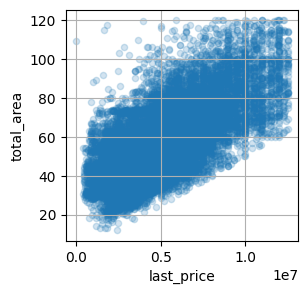

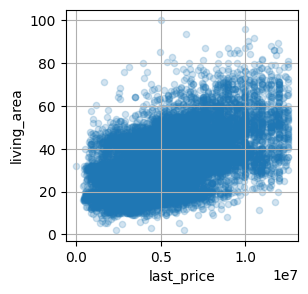

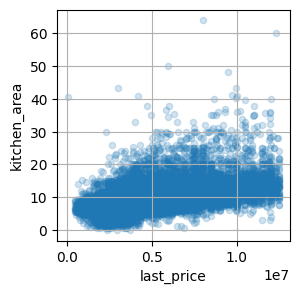

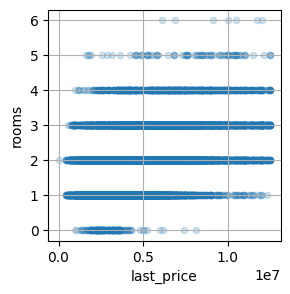

In [27]:
for element in array:
    try:
        data.plot(x='last_price',y=element, kind='scatter', figsize=(3, 3), grid=True, alpha=0.2)
    except:
        pass

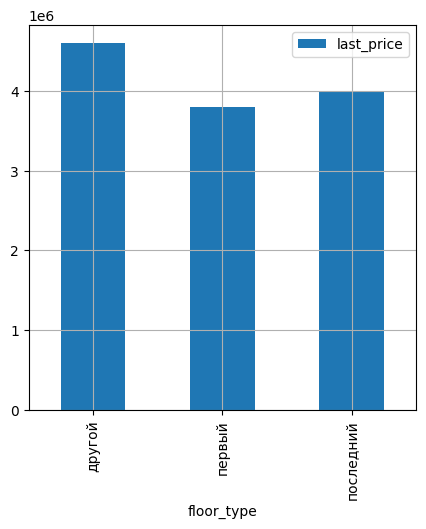

In [28]:
#array = ['floor_type','weekday','month','year']
data.pivot_table(
    index='floor_type',values='last_price',aggfunc='median'
    ).plot(y='last_price', kind='bar', figsize=(5, 5), grid=True)
plt.show()

**Цена квартир, расположенных на первом и последнем этажах, ниже чем цена на прочих этажах**

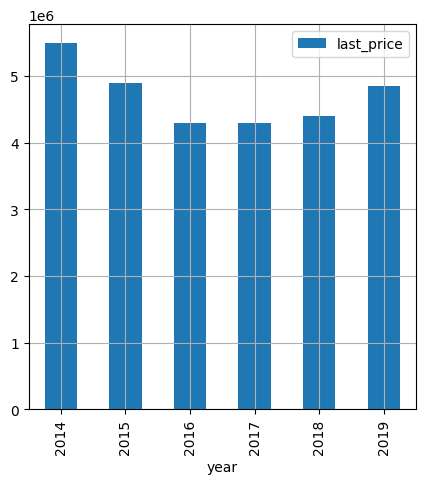

In [29]:
data.pivot_table(
    index='year',values='last_price',aggfunc='median'
    ).plot(y='last_price', kind='bar', figsize=(5, 5), grid=True)
plt.show()

**Наблюдается снижение цен на квартиры в период с 2014 по 2016 годы, затем наблюдается рост до 2019 года**

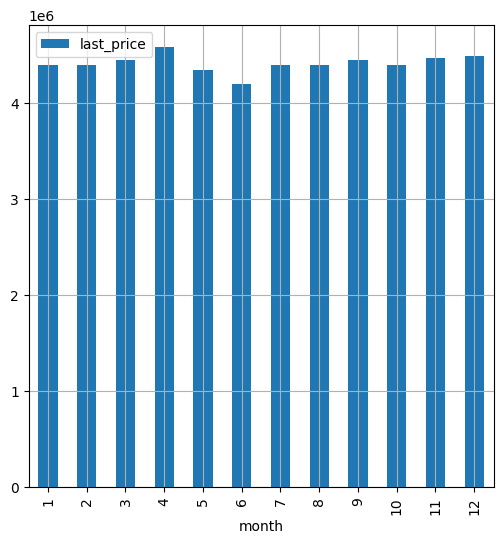

In [30]:
data.pivot_table(
    index='month',values='last_price',aggfunc='median'
    ).plot(y='last_price', kind='bar', figsize=(6, 6), grid=True)
plt.show()

**В июне как правило распродажа!!!**

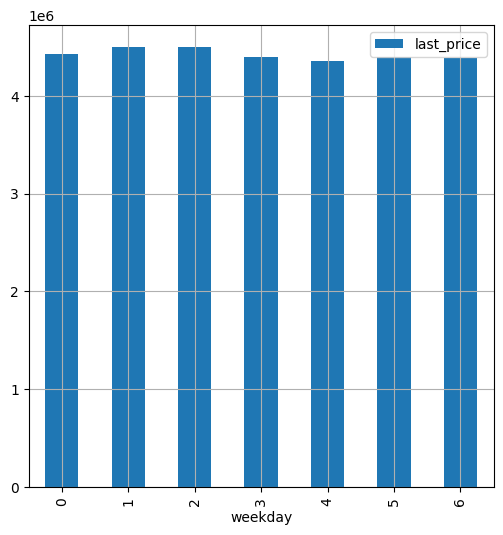

In [31]:
data.pivot_table(
    index='weekday',values='last_price',aggfunc='median'
    ).plot(y='last_price', kind='bar', figsize=(6, 6), grid=True)
plt.show()

**День недели практически не влияет на стоимость квартиры в объявлениях**

<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">

На стоимость квартир наибольше прямое влияние оказывает общая площадь квартиры, в меньшей степени влияние оказывают площадь кухни и жилая площадь. Но тем не менее влияние этих факторов также довольно существенно.

Влияние кол-ва комнат не значительно (коэффициент корреляции меньше 0.5), а дата публикации объявляния никак не сказывается на стоимости квартиры 

### Считаем среднюю цену одного квадратного метра в 10 населённых с наибольшим числом объявлений

In [32]:
#отбираем топ-10 локаций
locations = data.groupby('locality_name')['locality_name'].agg('count').sort_values(ascending=False).head(10)

#считаем среднюю цена кв.м. в отобранных локациях
location = locations.index
data.query('locality_name in @location').pivot_table(
    index='locality_name', values='price', aggfunc='mean'
)['price'].sort_values(ascending=False)

locality_name
Санкт-Петербург      105789.077842
Пушкин               100728.435294
деревня Кудрово       92409.768456
поселок Парголово     90332.236196
поселок Мурино        85681.758993
поселок Шушары        78666.179954
Колпино               75221.868657
Гатчина               68664.000000
Всеволожск            67222.434010
Выборг                58229.741379
Name: price, dtype: float64

<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">

Из топ-10 населенных пунктов с наибольшим числом объявлений самый дорогой квадрат приходится на Санкт-Петербург, самый дешевый квадрат приходится на Выборг

### Исследуем зависимость стоимости квартир Санкт-Петербурга от удаления от центра

<Axes: xlabel='cityCenters_nearest'>

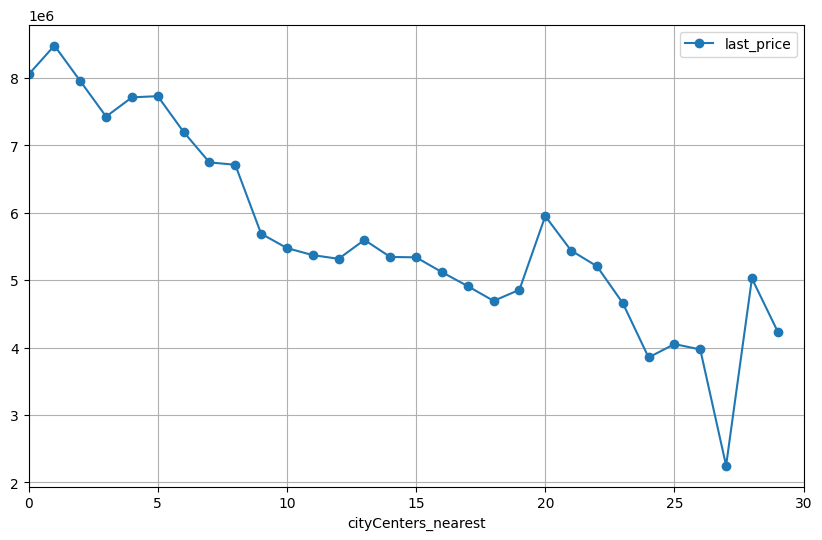

In [33]:
data.query('locality_name == "Санкт-Петербург"').pivot_table(
    index='cityCenters_nearest', values='last_price', aggfunc='mean'
).plot(y='last_price',style='o-',xlim=(0, 30), grid=True , figsize=(10,6))

<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">

Чем дальше от центра расположена квартира, тем она дешевле

### Общий вывод

Перед нами поставлена задача научиться определять рыночную стоимость объектов недвижимости на основании архивных данных сервиса Яндекс Недвижимость.

Описание данных:

    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    balcony — число балконов
    ceiling_height — высота потолков (м)
    cityCenters_nearest — расстояние до центра города (м)
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    first_day_exposition — дата публикации
    floor — этаж
    floors_total — всего этажей в доме
    is_apartment — апартаменты (булев тип)
    kitchen_area — площадь кухни в квадратных метрах (м²)
    last_price — цена на момент снятия с публикации
    living_area — жилая площадь в квадратных метрах (м²)
    locality_name — название населённого пункта
    open_plan — свободная планировка (булев тип)
    parks_around3000 — число парков в радиусе 3 км
    parks_nearest — расстояние до ближайшего парка (м)
    ponds_around3000 — число водоёмов в радиусе 3 км
    ponds_nearest — расстояние до ближайшего водоёма (м)
    rooms — число комнат
    studio — квартира-студия (булев тип)
    total_area — общая площадь квартиры в квадратных метрах (м²)
    total_images — число фотографий квартиры в объявлении

**Выполнена предобработка данных:**
* заполнены пропущенные значения там где это возможно
* добавлены новые столбцы
* изменены типы данных
* исправлены не явные дубликаты
* удалены записи с аномальными значениями

Очищенная выборка составила 21679 строк, то есть **более 90%** от изначальной выборки в количестве 23699 строк

Установлены следующие факты:
1. Квартиры как правило продаются в течение полугода (медиана 172 дня). Застойными можем считать квартиры, срок экспозиции которых превышает 220 дней (квантиль 75%). Эстремально долгой продажей считаем срок свыше 500 дней (1.5 межквантильного размаха).
2. На стоимость квартир наибольше прямое влияние оказывает общая площадь квартиры, в меньшей степени влияние оказывают площадь кухни и жилая площадь. Но тем не менее влияние этих факторов также довольно существенно. Влияние кол-ва комнат не значительно (коэффициент корреляции меньше 0.5), а дата публикации объявляния никак не сказывается на стоимости квартиры 
3. Из топ-10 населенных пунктов с наибольшим числом объявлений самый дорогой квадрат приходится на Санкт-Петербург, самый дешевый квадрат приходится на Выборг
4. Чем дальше от центра расположена квартира, тем она дешевле
5. Стоимость квартир на первом и последнем этажах ниже, чем на остальных этажах
6. Стоимость квартир, опубликованных в июне, ниже чем стоимость квартир в другие месяцы. Видимо люди, вернувшиеся летом из отпусков, становятся добрее и щедрее.
7. Наблюдается снижение цен на квартиры в период с 2014 по 2016 годы, затем наблюдается рост до 2019 года